<a href="https://colab.research.google.com/github/Julian6262/the_founder/blob/main/home%20work%2010/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1. Обнаружение фальшивых новостей**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Загрузка датасет
df = pd.read_csv('./fake_news.csv')
print(df.head(5))

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [ ]:
# Проверка на пустые строки
print(df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df.label, test_size=0.2)

REAL     3171
FAKE     3164
TOTAL    6335
Name: label, dtype: int64


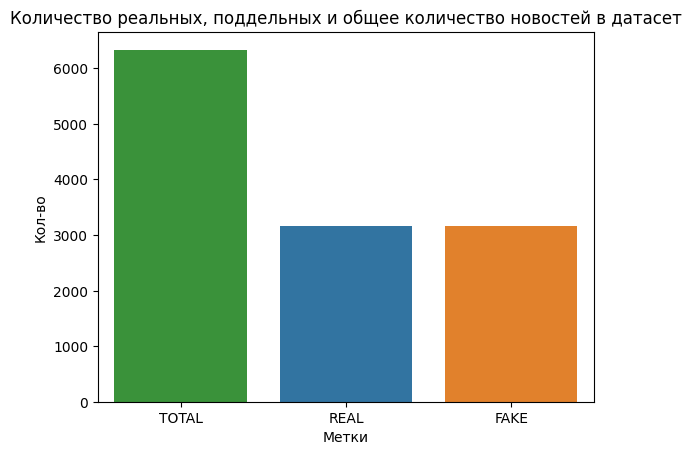

In [ ]:
label = df.label.value_counts()
label.loc['TOTAL'] = df.shape[0]
print(label)

fig = sns.barplot(x=label.index, y=label, hue=label.index, order=['TOTAL', 'REAL', 'FAKE'])
fig.set(xlabel='Метки', ylabel='Кол-во')
plt.title("Количество реальных, поддельных и общее количество новостей в датасет")
plt.show()

In [ ]:
# Преобразование текстовых данных в матрицу TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Обучение модели классификации
pac = PassiveAggressiveClassifier(max_iter=50, verbose=True)
pac.fit(X_train_tfidf, y_train)

# Предсказание категорий для тестовых данных
y_pred = pac.predict(X_test_tfidf)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'\nТочность модели: {round(accuracy * 100, 2)}%')

-- Epoch 1
Norm: 38.87, NNZs: 47122, Bias: -0.627366, T: 5039, Avg. loss: 0.319725
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 44.60, NNZs: 48113, Bias: -0.524816, T: 10078, Avg. loss: 0.074253
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 47.22, NNZs: 48774, Bias: -0.548533, T: 15117, Avg. loss: 0.031769
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 48.35, NNZs: 48822, Bias: -0.534698, T: 20156, Avg. loss: 0.014147
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 48.86, NNZs: 48841, Bias: -0.537032, T: 25195, Avg. loss: 0.007866
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 49.06, NNZs: 48847, Bias: -0.541776, T: 30234, Avg. loss: 0.004609
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 49.16, NNZs: 48849, Bias: -0.538288, T: 35273, Avg. loss: 0.003619
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 49.20, NNZs: 48849, Bias: -0.539966, T: 40312, Avg. loss: 0.003073
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 49.23, NNZs: 48849, Bias: -0.539

Confusion Matrix:
 [[611  32]
 [ 37 587]]


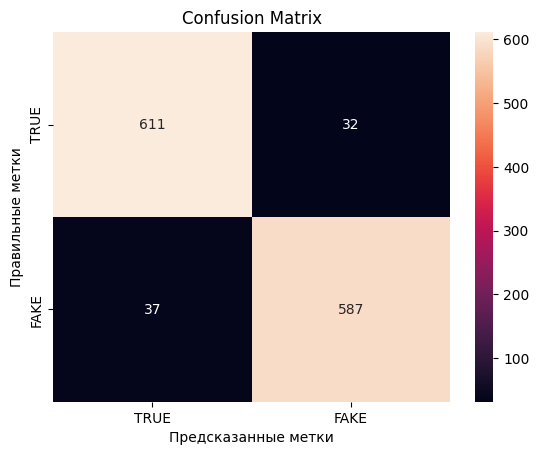

In [ ]:
# Построение confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Предсказанные метки')
ax.set_ylabel('Правильные метки')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['TRUE', 'FAKE'])
ax.yaxis.set_ticklabels(['TRUE', 'FAKE'])
plt.show()

Далее проверка части фраз из новостей на модели: 5ть новостей из тестовой выборки и 5ть реальных новостей с сайтов.

In [ ]:
text_test = ['Daniel Greenfield, a Shillman Journalism',      # FAKE
             'The online comment fits closely with his',      # REAL
             'NEW YORK - Bernie Sanders is at a crossroads',  # REAL
             'Support Us Should I Get Botox?',                # FAKE
             'The president now plans to continue a U.S']     # REAL

X_tfidf = tfidf_vectorizer.transform(text_test)
y_pred = pac.predict(X_tfidf)
print('\nПроверка на тестовой выборке')
print('Должно быть: FAKE, REAL, REAL, FAKE, REAL')
print('Как есть:', *y_pred)

text_real_news = ['The plane went down in the Belgorod region near the Ukrainian border, Russian officials say',
                  'Ryan Gosling says what everyone’s thinking about ‘Barbie’ Oscar snubs',
                  'The 14km border that separates Gaza from Egypt has been used for years by militants in the enclave to smuggle weapons, technology, money, and personnel.',
                  'The country has been gripped by continued major protests since early January, when farmers started blocking roads and highways after Berlin',
                  'Staff members and hundreds of patients were trapped at a hospital by heavy fighting in southern Gaza']

X_tfidf = tfidf_vectorizer.transform(text_real_news)
y_pred = pac.predict(X_tfidf)
print('\nПроверка на реальных новостях:')
print('Должно быть: REAL, REAL, REAL, REAL, REAL')
print('Как есть:', *y_pred)


Проверка на тестовой выборке
Должно быть: FAKE, REAL, REAL, FAKE, REAL
Как есть: FAKE REAL REAL FAKE FAKE

Проверка на реальных новостях:
Должно быть: REAL, REAL, REAL, REAL, REAL
Как есть: REAL REAL FAKE REAL FAKE
